In [1]:
%pylab inline
!pip install JSAnimation

Populating the interactive namespace from numpy and matplotlib
  Preparing metadata (setup.py) ... done
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11405 sha256=981514e39b5dfc37392c13bd566aa606724208578c04a25eafcfa678ec945a7a
  Stored in directory: /root/.cache/pip/wheels/1e/16/64/028f540fe8f5eae5026a423bfd88356248074379b79f27b646
Successfully built JSAnimation


In [2]:
def sense(x):
  return x

In [ ]:
def simulate(dt, x, u):
  x += dt*u
  return x

In [ ]:
def control(t, y):

  # #Control policy for line
  # ux = 1.0
  # uy = 0.0



  # #Control policy for circular trajectory
  # theta = t
  # r = 2.0 # radius
  # # Inputs Cartesian coordinates
  # ux = r * np.cos(theta)
  # uy = r * np.sin(theta)



  # Control policy for ellipse with center (3,2) and major and minor axis as 4 and 2
  a = 4.0  # semi-major axis
  b = 2.0  # semi-minor axis
  h = 3.0  # x-coordinate of the center
  k = 2.0  # y-coordinate of the center

  # Parametric equations of the ellipse
  theta = t  # Assuming time is used as the parameter
  x = h + a * np.cos(theta)
  y = k + b * np.sin(theta)

  # Control policy to achieve the desired position
  ux = -a * np.sin(theta)  # Derivative of x with respect to time
  uy = b * np.cos(theta)   # Derivative of y with respect to time



  # # Control Policy for the rotated eight curve
  # a = 2.0  # Adjust the size of the eight
  # feq = 1.0  # Angular frequency
  # theta = np.pi / 2  # Rotation angle in radians

  # # Parametric equations for the rotated eight curve
  # x = a * np.sin(feq * t)
  # y = a * np.sin(2 * feq * t) * np.cos(2*feq*t)

  return array([ux, uy])

In [ ]:
#tf = 2*np.pi # for line, circular trajectory & ellipse
tf = 15 # covering multiple cycles for eight curve
dt = 0.1
time = linspace(0., tf, int(tf/dt)+1)

x = np.array([0.0, 0.0])
x_log = [copy(x)]

for t in time:
  y = sense(x)
  u = control(t, y)
  x = simulate(dt, x, u)
  x_log.append(copy(x))

x_log = array(x_log)

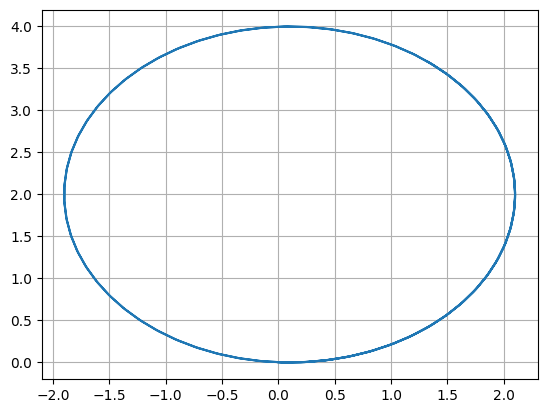

In [ ]:
grid()
plot(x_log[:,0], x_log[:,1])

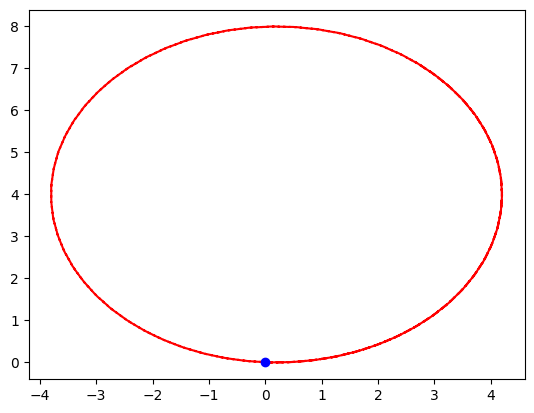

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()

def animate(t):
    ax.clear()

    # Path
    ax.plot(x_log[:, 0], x_log[:, 1], 'r--')

    # Initial conditions
    ax.plot(x_log[t, 0], x_log[t, 1], 'bo')

anim = animation.FuncAnimation(fig, animate, frames=len(x_log), interval=60)
HTML(anim.to_jshtml())